In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load the Excel file
TX = pd.read_excel('data/TX_pattern.xlsx', header=None)
RX = pd.read_excel('data/RX_pattern.xlsx', header=None)
OMNI = pd.read_excel('data/OMNI_pattern.xlsx', header=None)

In [3]:
# Convert the DataFrame to a NumPy array
TX_pattern = TX.to_numpy()
RX_pattern = RX.to_numpy()
OMNI_pattern = OMNI.to_numpy()

In [4]:
print(TX_pattern.shape)
print(RX_pattern.shape)
print(OMNI_pattern.shape)

(360, 360)
(360, 360)
(360, 360)


In [5]:
# TX vertical shift
TX_vertical1 = TX_pattern[-90:, :]
TX_vertical2 = TX_pattern[:-90, :]
TX_pattern = np.vstack((TX_vertical1, TX_vertical2))

# RX vertical shift
RX_vertical1 = RX_pattern[-90:, :]
RX_vertical2 = RX_pattern[:-90, :]
RX_pattern = np.vstack((RX_vertical1, RX_vertical2))

# RX horizontal shift
RX_horizontal1 = RX_pattern[:,-180:]
RX_horizontal2 = RX_pattern[:,:-180]
RX_pattern = np.hstack((RX_horizontal1, RX_horizontal2))

# OMNI vertical shift
OMNI_vertical1 = OMNI_pattern[-270:, :]
OMNI_vertical2 = OMNI_pattern[:-270, :]
OMNI_pattern = np.vstack((OMNI_vertical1, OMNI_vertical2))

In [6]:
np.save('data/TX_pattern.npy', TX_pattern)
np.save('data/RX_pattern.npy', RX_pattern)
np.save('data/OMNI_pattern.npy', OMNI_pattern)

In [7]:
RX_pattern = np.load('data/RX_pattern.npy')
TX_pattern = np.load('data/TX_pattern.npy')
OMNI_pattern = np.load('data/OMNI_pattern.npy')

In [8]:
angles = np.linspace(0, 359, num=360)
angles = angles*np.pi/180

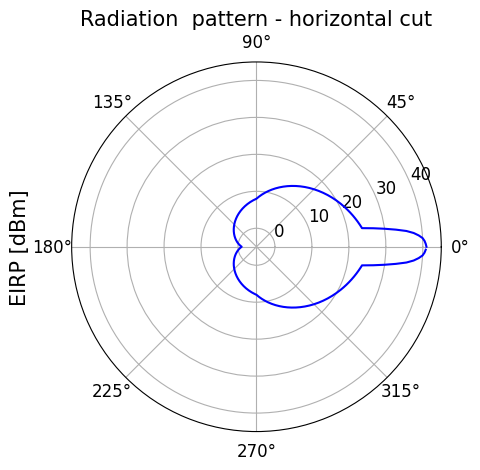

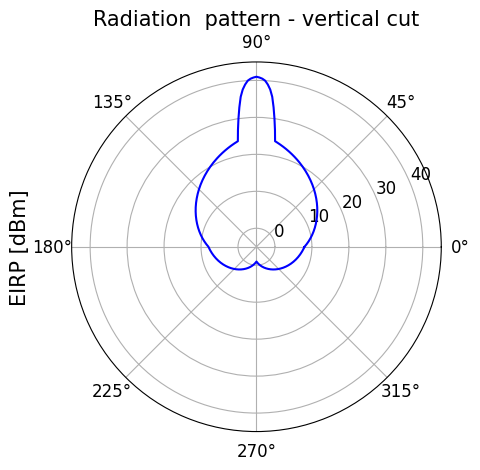

In [9]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, TX_pattern[90, :], color='blue')
ax.set_ylim(-5, 45)
ax.set_title("Radiation  pattern - horizontal cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, TX_pattern[:, 0], color='blue')
ax.set_ylim(-5, 45)
ax.set_title("Radiation  pattern - vertical cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()

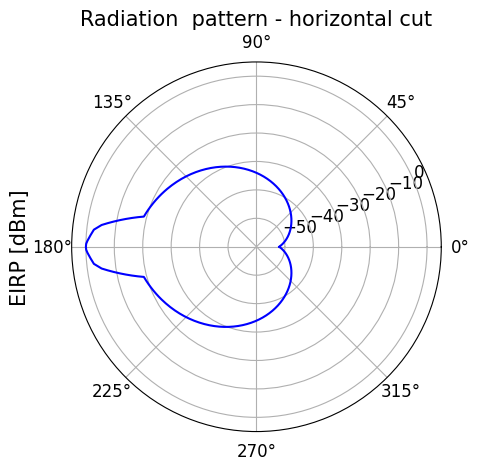

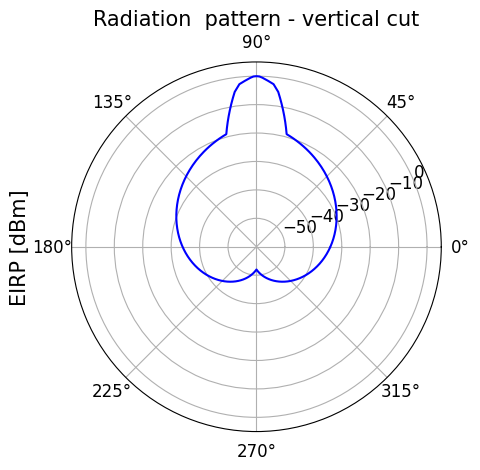

In [10]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, RX_pattern[90, :], color='blue')
ax.set_ylim(-60, 5)
ax.set_title("Radiation  pattern - horizontal cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, RX_pattern[:, 180], color='blue')
ax.set_ylim(-60, 5)
ax.set_title("Radiation  pattern - vertical cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()

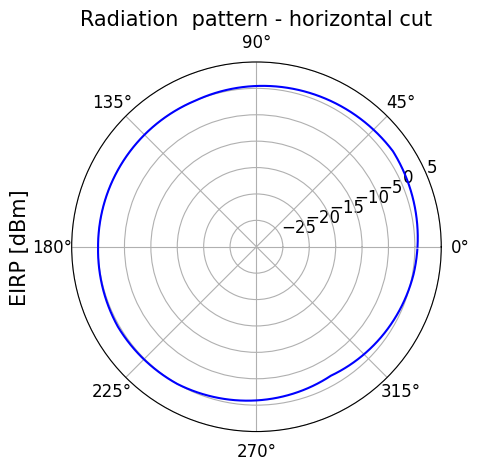

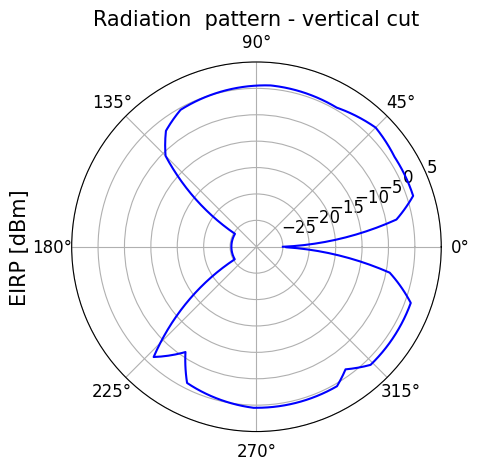

In [11]:
fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, OMNI_pattern[270, :], color='blue')
ax.set_ylim(-30, 5)
ax.set_title("Radiation  pattern - horizontal cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()

fig, ax = plt.subplots(subplot_kw={'projection': 'polar'})
ax.plot(angles, OMNI_pattern[:, 0], color='blue')
ax.set_ylim(-30, 5)
ax.set_title("Radiation  pattern - vertical cut", fontsize=15)
ax.set_ylabel('EIRP [dBm]', labelpad=30, fontsize=15)
ax.tick_params(axis='y',labelsize=12)
ax.tick_params(axis='x',labelsize=12)
ax.grid(True)
plt.show()